# Домашнее задание к лекции "Визуализация данных"

Обязательная часть
## Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

1. построить не менее 4 визуализаций различных видов;
2. каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
3. по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
4. Откуда брать данные?
   
   Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

1. данные приложений из Google Play;
2. данные о видео из трендов YouTube;
3. данные об уровне счастья в разных странах;
4. данные по фильмам и сериалам Netflix.

Дополнительная часть (необязательная)
1. построить дополнительно не менее 2 визуализаций (итого не менее 6);
2. в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
не менее двух визуализаций должны быть интерактивными.

## ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий GitHub. Не сможем проверить или помочь, если вы пришлете:

файлы;
архивы;
скриншоты кода.
Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:
1) Что я делаю?
2) Какого результата я ожидаю?
3) Как фактический результат отличается от ожидаемого?
4) Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import numpy as np 
import pandas as pd 
import folium
import squarify

data = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
#data

False

In [14]:
# считываю заголовки данных
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [15]:
# описание ситуаций в базе данных
data.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


In [16]:
#проверка на пустые значения
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [13]:
# заполнение пустых значений по шаблону
data['PdDistrict'].fillna(data['PdDistrict'].mode()[0], inplace = True)
data.isnull().any().any()

False

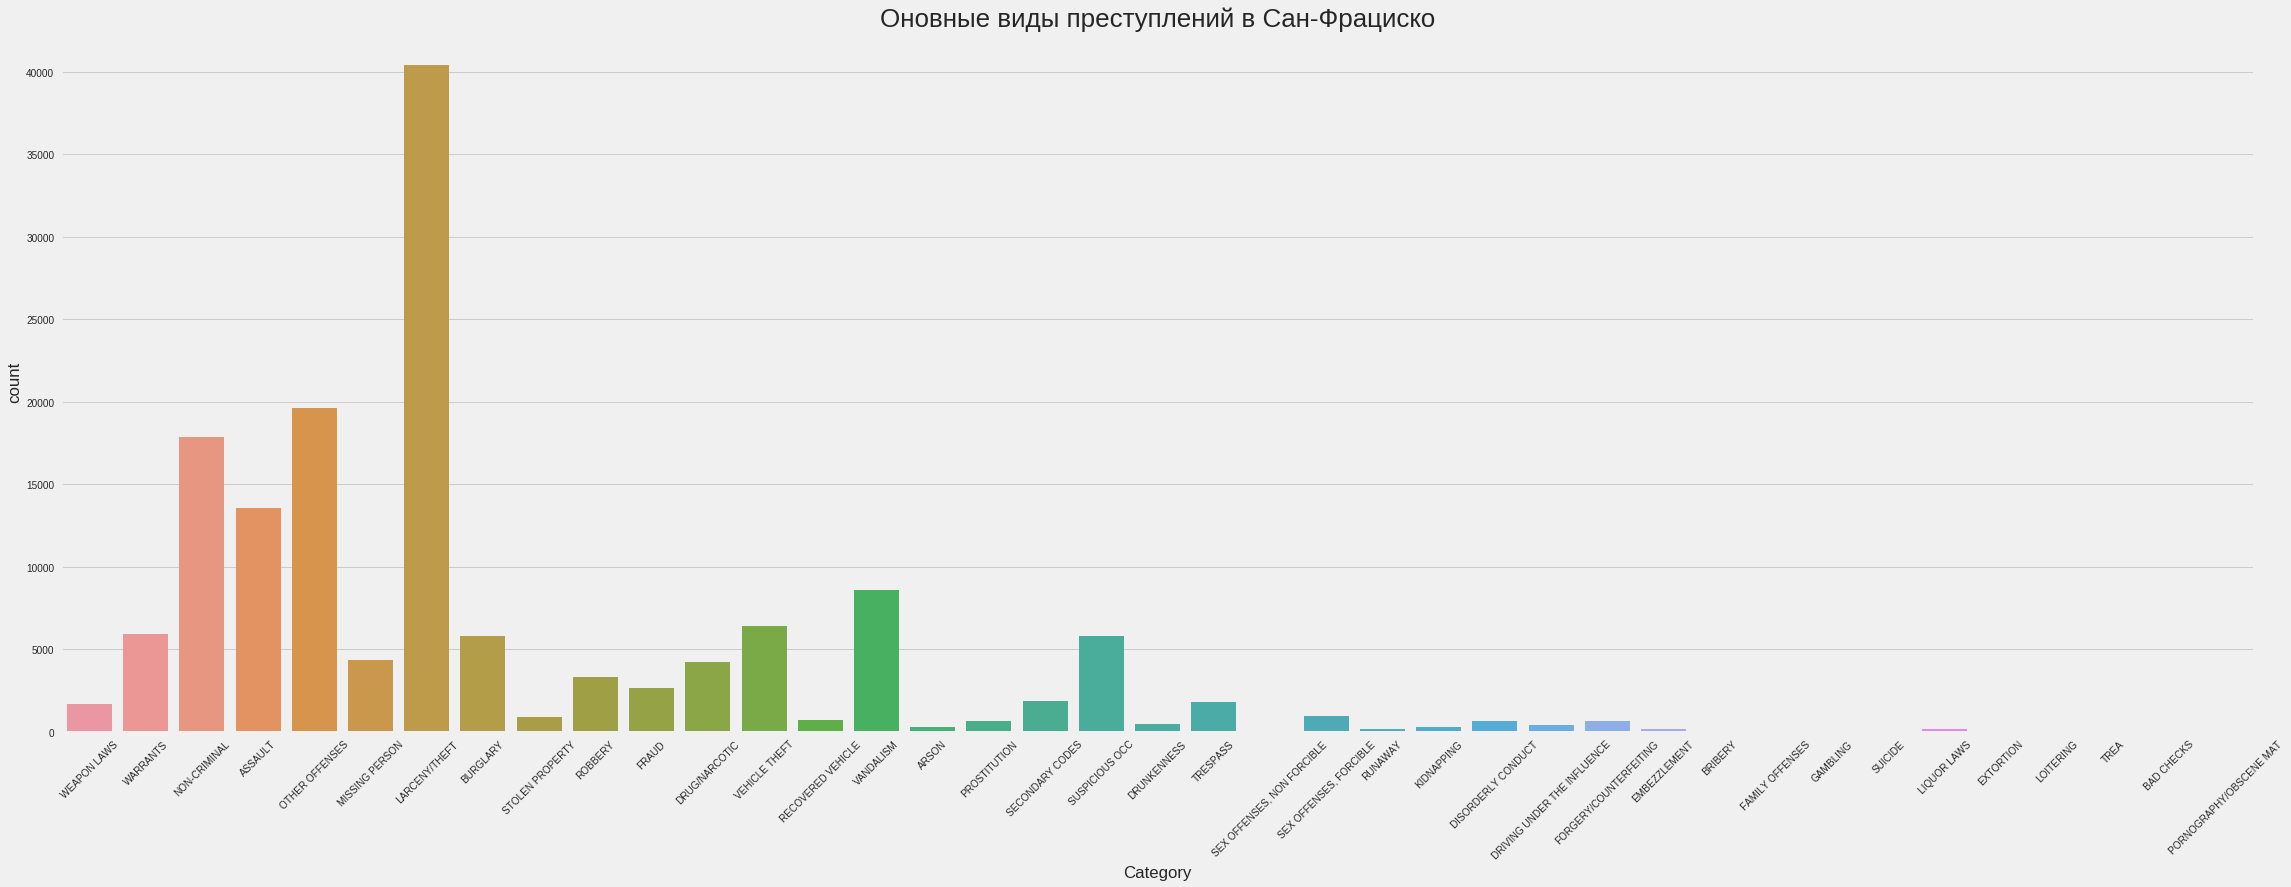

Наиболее распространённым видом правонарушения является воровство


In [83]:
# Наиболее распространённый вид преступлений?

plt.rcParams['figure.figsize'] = (35, 12)

sns.countplot(data['Category'])

plt.title('Оновные виды преступлений в Сан-Фрациско', fontsize = 26)
plt.xticks(rotation = 45)
plt.show()

print('Наиболее распространённым видом правонарушения является воровство')

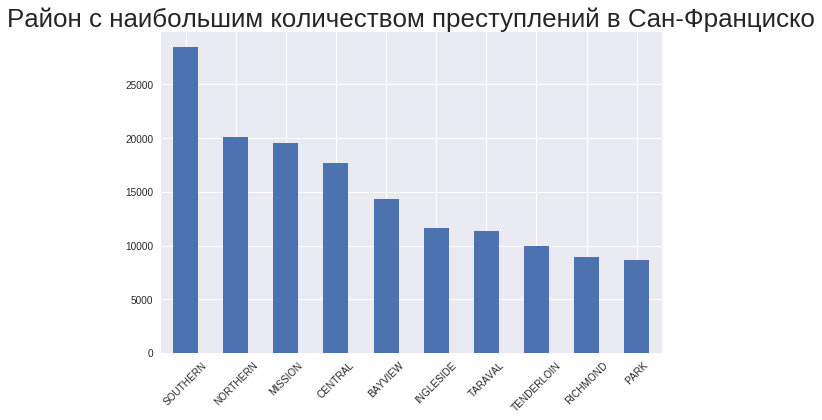

Большинство правонарушений происходит в "Южном" (Southern) районе


In [54]:
# В каком районе происходит большиство правонарушений?

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

data['PdDistrict'].value_counts().plot.bar()

plt.title('Район с наибольшим количеством преступлений в Сан-Франциско',fontsize = 26)

plt.xticks(rotation = 45)
plt.show()

print('Большинство правонарушений происходит в "Южном" (Southern) районе')

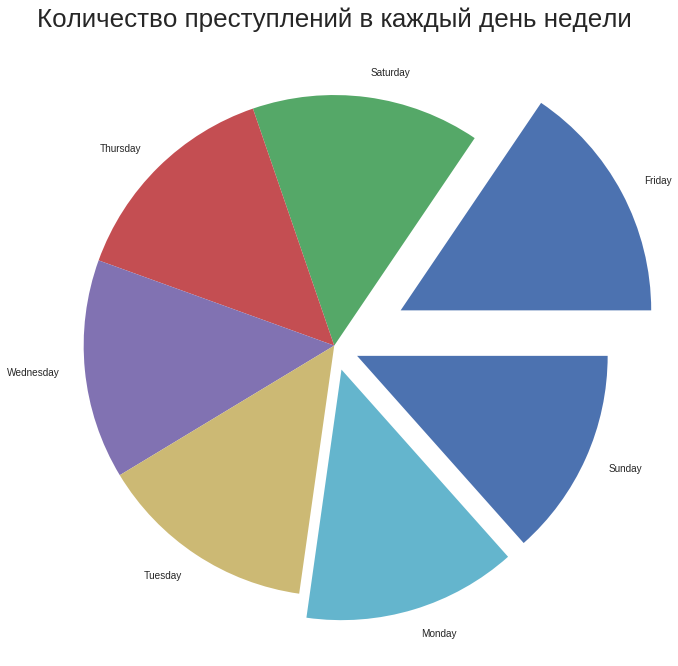

Преступления визуально равномерно распределены по дням недели и не меняются в зависимости от дня недели


In [80]:
# Влияют ли дни недели на количество преступлений?

plt.style.use('seaborn')


data['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (10, 15), explode = (0.3, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1))

plt.title('Количество преступлений в каждый день недели',fontsize = 26)

plt.xticks(rotation = 45)
plt.axis('off')
plt.show()

print('Преступления визуально равномерно распределены по дням недели и не меняются в зависимости от дня недели')

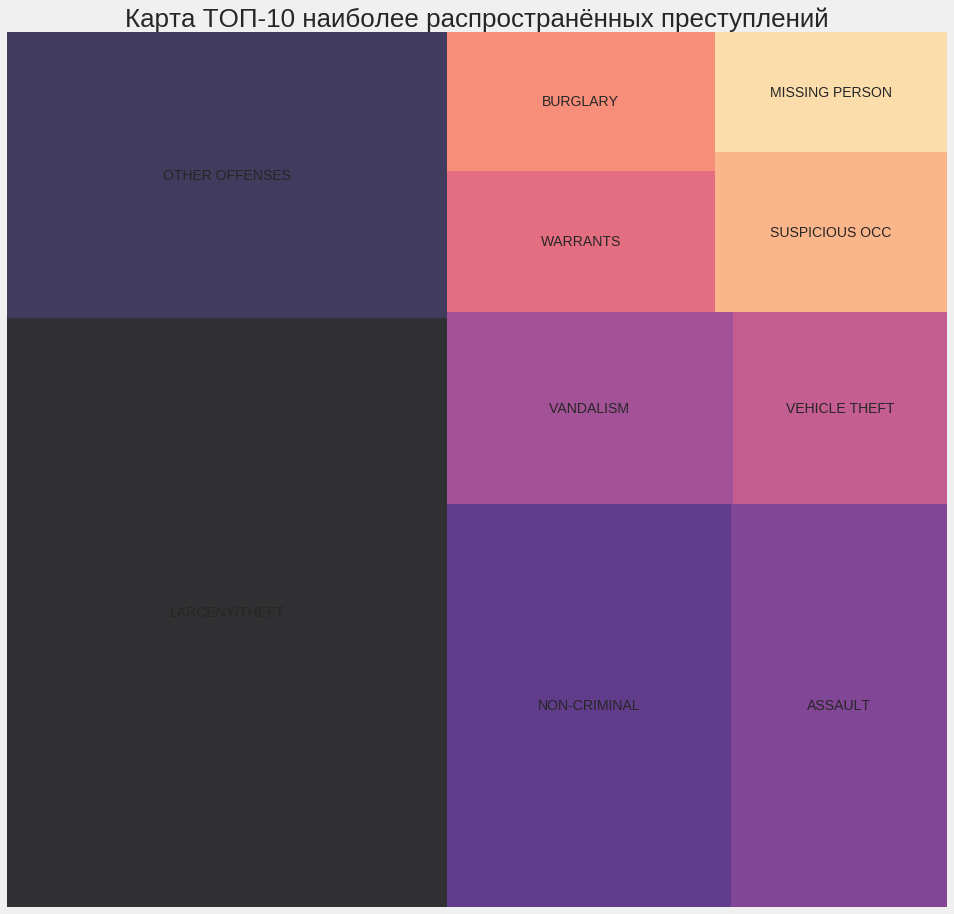

Наиболее распространённым видом правонарушения является воровство


In [104]:
# Наиболее распространённый вид преступлений?
y = data['Category'].value_counts().head(10)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 5, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Карта ТОП-10 наиболее распространённых преступлений', fontsize = 26)

plt.axis('off')
plt.show()

print('Наиболее распространённым видом правонарушения является воровство')